# SI 618: Data Manipulation and Analysis
## 05 - Applied Statistics I

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

Version 2022.02.07.1.CT

## Correlation and Regression
### Wine quality

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings. 
 

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
wine = pd.read_csv(
    'https://raw.githubusercontent.com/umsi-data-science/data/main/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1: List the 5 largest correlations in the wine quality dataset

Feeling ambitious?  Try to get the following output:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>var1</th>
      <th>var2</th>
      <th>corr</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12</th>
      <td>fixed acidity</td>
      <td>pH</td>
      <td>-0.682978</td>
    </tr>
    <tr>
      <th>14</th>
      <td>citric acid</td>
      <td>fixed acidity</td>
      <td>0.671703</td>
    </tr>
    <tr>
      <th>16</th>
      <td>density</td>
      <td>fixed acidity</td>
      <td>0.668047</td>
    </tr>
    <tr>
      <th>18</th>
      <td>free sulfur dioxide</td>
      <td>total sulfur dioxide</td>
      <td>0.667666</td>
    </tr>
    <tr>
      <th>20</th>
      <td>citric acid</td>
      <td>volatile acidity</td>
      <td>-0.552496</td>
    </tr>
  </tbody>
</table>

In [8]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [29]:
# corr, abs 因为负相关大也是大
wine_corr = wine.corr()
wine_corr_abs = wine.corr().abs()
wine_corr_abs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.124052
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.390558
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.128907
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.050656
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.174919
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.057731
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.251397


In [13]:
# to ascending df 
wine_corr_indexed = wine_corr_abs.unstack(
).sort_values(ascending=False).reset_index()

wine_corr_indexed

,level_0,level_1,0
0,fixed acidity,fixed acidity,1.000000
1,volatile acidity,volatile acidity,1.000000
2,alcohol,alcohol,1.000000
3,sulphates,sulphates,1.000000
4,pH,pH,1.000000
...,...,...,...
139,chlorides,free sulfur dioxide,0.005562
140,residual sugar,sulphates,0.005527
141,sulphates,residual sugar,0.005527
142,residual sugar,volatile acidity,0.001918


In [14]:
# delete self-raleted
wine_nosame = wine_corr_indexed[wine_corr_indexed['level_0']
                                != wine_corr_indexed['level_1']]

wine_nosame

,level_0,level_1,0
12,fixed acidity,pH,0.682978
13,pH,fixed acidity,0.682978
14,fixed acidity,citric acid,0.671703
15,citric acid,fixed acidity,0.671703
16,fixed acidity,density,0.668047
...,...,...,...
139,chlorides,free sulfur dioxide,0.005562
140,residual sugar,sulphates,0.005527
141,sulphates,residual sugar,0.005527
142,residual sugar,volatile acidity,0.001918


In [15]:
def swap(x):
    if (x['level_0'] > x['level_1']):
        temp = x.level_0
        x.level_0 = x.level_1
        x.level_1 = temp
    return x

In [16]:
# swap and delete dupliacate, get variables we want
wine_alpha = wine_nosame.apply(swap, axis=1)
wine_alpha

,level_0,level_1,0
12,fixed acidity,pH,0.682978
13,fixed acidity,pH,0.682978
14,citric acid,fixed acidity,0.671703
15,citric acid,fixed acidity,0.671703
16,density,fixed acidity,0.668047
...,...,...,...
139,chlorides,free sulfur dioxide,0.005562
140,residual sugar,sulphates,0.005527
141,residual sugar,sulphates,0.005527
142,residual sugar,volatile acidity,0.001918


In [22]:
wine_nodups = wine_alpha.drop_duplicates()
wine_nodups

,level_0,level_1,0
12,fixed acidity,pH,0.682978
14,citric acid,fixed acidity,0.671703
16,density,fixed acidity,0.668047
18,free sulfur dioxide,total sulfur dioxide,0.667666
20,citric acid,volatile acidity,0.552496
...,...,...,...
134,quality,residual sugar,0.013732
136,free sulfur dioxide,volatile acidity,0.010504
138,chlorides,free sulfur dioxide,0.005562
140,residual sugar,sulphates,0.005527


In [27]:
# locate variables from original corr table with all -+ value
wine_nodups_signed = wine_nodups.apply(lambda x: wine_corr.loc[x.level_0][x.level_1], axis=1)
wine_nodups_signed

12    -0.682978
14     0.671703
16     0.668047
18     0.667666
20    -0.552496
         ...   
134    0.013732
136   -0.010504
138    0.005562
140    0.005527
142    0.001918
Length: 66, dtype: float64

In [28]:
# get final table, replace the value column
final = pd.concat([wine_nodups.drop(0,axis=1),wine_nodups_signed],axis=1)
final.columns=['var1','var2','corr']
final.head()

,var1,var2,corr
12,fixed acidity,pH,-0.682978
14,citric acid,fixed acidity,0.671703
16,density,fixed acidity,0.668047
18,free sulfur dioxide,total sulfur dioxide,0.667666
20,citric acid,volatile acidity,-0.552496


Stacking the dataframe to combine two variables to the same row. Then, showing corrlations and only remain the different pairs to compare their absolute values. Finally, we can sort the value by corr and list the top 5 correlations.

### Q2: Create a JointGrid-based plot that contains a regplot and a histplot for "free sulphur dioxide" vs. "total sulphur dioxide".

In [30]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

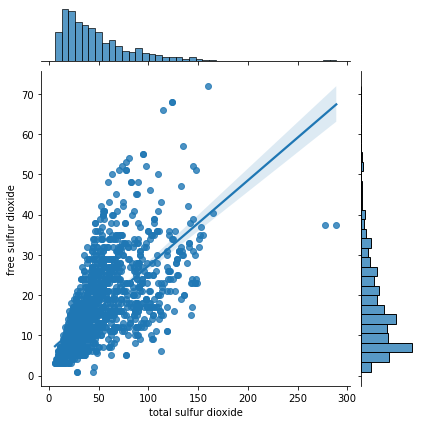

In [31]:
# way1
g = sns.JointGrid(data=wine, y='free sulfur dioxide', x='total sulfur dioxide')
g = g.plot(sns.regplot, sns.histplot)

Text(0.5, 0.98, 'Free vs. Total Sulfur Dioxide')

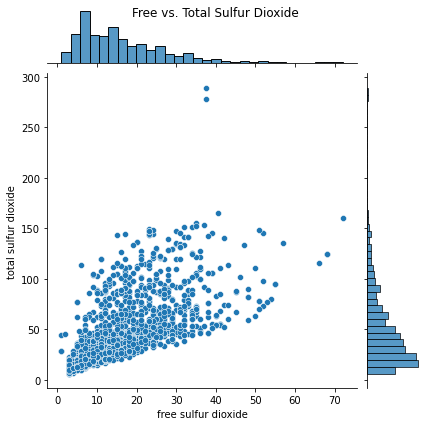

In [32]:
# way2
disp = sns.jointplot(x='free sulfur dioxide',y='total sulfur dioxide',data=wine)
disp.fig.suptitle('Free vs. Total Sulfur Dioxide')

## Ordinary Least Squares (OLS) Regression

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Remember that statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

### Q3: Create a regression model with "total sulfur dioxide" as the dependent variable and "free sulfur dioxide" as the predictor variable.
Report the following:
1. Coefficient of determination (i.e. $r^2$)
2. Whether the regression is statistically significant
3. An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

In [34]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [35]:
model2 = smf.ols("Q('total sulfur dioxide') ~ Q('free sulfur dioxide')", data=wine).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('total sulfur dioxide')   R-squared:                       0.446
Model:                                   OLS   Adj. R-squared:                  0.445
Method:                        Least Squares   F-statistic:                     1285.
Date:                       Sat, 12 Feb 2022   Prob (F-statistic):          6.40e-207
Time:                               16:30:29   Log-Likelihood:                -7382.4
No. Observations:                       1599   AIC:                         1.477e+04
Df Residuals:                           1597   BIC:                         1.478e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.1354      1.114     11.795      0.000      10.951      15.320
Q('free sulfur dioxide')     2.0997      0.059     35.840      0.000       1.985       2.215
==============================================================================
Omnibus:                      621.223   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.294
Skew:                           1.767   Prob(JB):                         0.00
Kurtosis:                       8.915   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
13.1354 + 2.0997*60

139.1174

In [ ]:
# Coefficient of determination (i.e.  𝑟2 )
# Whether the regression is statistically significant
# An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

The intercept is 13.1354 and the coefficient of the predictor "free sulfur dioxide" is 2.0997 in the model, so the estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60 is 139.1174.

* The Coefficient of determination r2 is 0.446 and adjusted r2 is 0.445 for the model.
* The regression is statistically significant since the p-value for the F statistic is 6.40e-207 which is much less than 0.05, indicating that the regression is statistically significant at 0.05 confidence level.
* An estimate for the value of "total sulfur dioxide" when the value of "free sulfur dioxide" is 60.

### Q4: Create an influence plot for the regression of "total sulfur dioxide" vs. "free sulfur dioxide".  

Visually identify outliers.



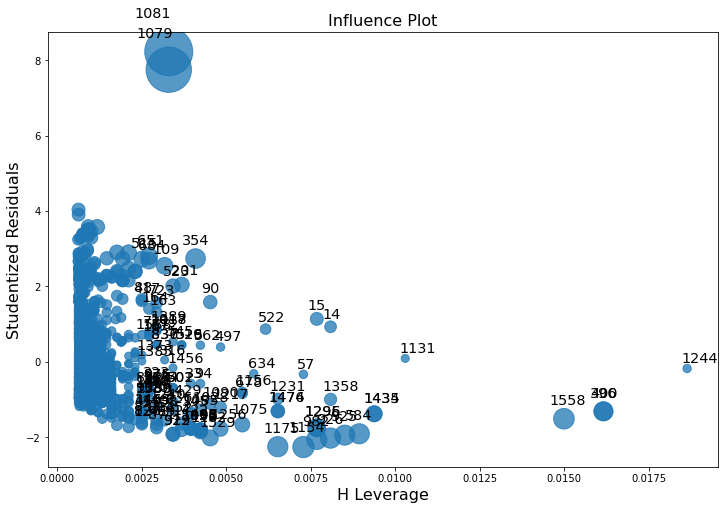

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model2, ax=ax, criterion="Cooks", alpha=0.0000005)

In [39]:
# risidual == vertical outliar
# leverage == horizental large on the reg line
# cooks distance == level of outlier
# the number == the line number in the original df, can iloc locate

In [40]:
wine.iloc[1079]

fixed acidity             7.90000
volatile acidity          0.30000
citric acid               0.68000
residual sugar            8.30000
chlorides                 0.05000
free sulfur dioxide      37.50000
total sulfur dioxide    278.00000
density                   0.99316
pH                        3.01000
sulphates                 0.51000
alcohol                  12.30000
quality                   7.00000
Name: 1079, dtype: float64

In [41]:
wine.iloc[1081]

fixed acidity             7.90000
volatile acidity          0.30000
citric acid               0.68000
residual sugar            8.30000
chlorides                 0.05000
free sulfur dioxide      37.50000
total sulfur dioxide    289.00000
density                   0.99316
pH                        3.01000
sulphates                 0.51000
alcohol                  12.30000
quality                   7.00000
Name: 1081, dtype: float64

Visualize the outliers: 1079 and 1081. This is because they are points with large the studentized residuals and cook's distances, and then we identify them as outliers.

In [42]:
wine.describe() 
# can compare

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [82]:
# c,p = infl.cooks_distance
# This function returns an array of values for Cook’s distance for each observation followed by an array of corresponding p-values. 
# And then you can decide influence points based on statistically significant Cook's distances. 

### Q5: How many influence points are there, according to statistically significant Cook's distances?


In [43]:
inf1 = model2.get_influence()
sm_fr = inf1.summary_frame().sort_values(by="cooks_d",ascending=False)
sm_fr

,dfb_Intercept,dfb_Q('free sulfur dioxide'),cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1081,-0.242537,0.426169,1.075528e-01,8.060284,0.003300,0.463795,8.226837,0.473378
1079,-0.228478,0.401465,9.588442e-02,7.610506,0.003300,0.437914,7.749958,0.445938
1154,0.123454,-0.185216,1.871485e-02,-2.258316,0.007286,-0.193468,-2.261223,-0.193717
1558,0.131444,-0.182472,1.735861e-02,-1.510124,0.014995,-0.186326,-1.510730,-0.186400
926,0.118632,-0.175523,1.666267e-02,-2.021478,0.008089,-0.182552,-2.023435,-0.182729
...,...,...,...,...,...,...,...,...
193,0.000215,-0.000145,2.499602e-08,0.006813,0.001076,0.000224,0.006811,0.000224
117,0.000215,-0.000145,2.499602e-08,0.006813,0.001076,0.000224,0.006811,0.000224
194,0.000215,-0.000145,2.499602e-08,0.006813,0.001076,0.000224,0.006811,0.000224
816,0.000081,-0.000052,3.685543e-09,0.002741,0.000980,0.000086,0.002740,0.000086


Data point that has a large value for Cook's Distance indicates that it strongly influences the fitted values.

A general rule of thumb is that any point with a Cook's Distance over 4/n (where n is the total number of data points) is considered to be an outlier.

In [44]:
len(wine)

1599

In [45]:
sm_fr[sm_fr["cooks_d"]>=0.05]

,dfb_Intercept,dfb_Q('free sulfur dioxide'),cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1081,-0.242537,0.426169,0.107553,8.060284,0.0033,0.463795,8.226837,0.473378
1079,-0.228478,0.401465,0.095884,7.610506,0.0033,0.437914,7.749958,0.445938


Let cook's distance larger than 0.05 as the influential points, then there are 2 influence points: 1081 and 1079 according to statistically significant Cook's distances.

## Hypothesis testing (t-test and ANOVA)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [47]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

For this section, we draw our inspiration from the FiveThirtyEight article "‘Straight Outta Compton’ Is The Rare Biopic Not About White Dudes" (https://fivethirtyeight.com/features/straight-outta-compton-is-the-rare-biopic-not-about-white-dudes/).  FiveThiryEight has a great habit of publishing the data
that underpin their stories and those data are available via GitHub so it's easy to 
load them into a DataFrame:

In [49]:
biopics = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/biopics/biopics.csv", encoding="latin1")

In [50]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz


We're interested in the 'box_office' variable, which is an oddly-formatted representation of the box-office earnings for each movie.  We're going to create a function that 
converts representations like '$56.7M' to '56700000'.  How?

Time for some regular expressions (yay!):

## Q6: Fill in the regular expression


In [51]:
import re
import numpy as np

def box_office_dollars(earnings):
    
    m = re.match(r'\$(\d+\.?\d*)([MK])',earnings)
    if not m:
        return np.NaN
    
    ret = m.group(1)
    if not ret:
        return np.NaN
    
    try:
        ret = float(ret)
    except:
        return np.NaN
    
    if m.group(2) == 'M':
        return ret * 1_000_000
    if m.group(2) == 'K':
        return ret * 1_000
    
    return ret

# Test out our function, which should print 537000.0 given $537K
print(box_office_dollars("37K"))
print(box_office_dollars("$537M"))

nan
537000000.0


And apply it to our DataFrame, creating a new column called 'box_office_dollars'

In [52]:
biopics['box_office_dollars'] = biopics['box_office'].apply(box_office_dollars)

In [53]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough,NaN
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher,NaN
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0


## Q7: What should we do with our missing values:

In [54]:
biopics = biopics.dropna(subset=['box_office_dollars'])

In [56]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0


As always, let's take a look at the distribution of our variable:


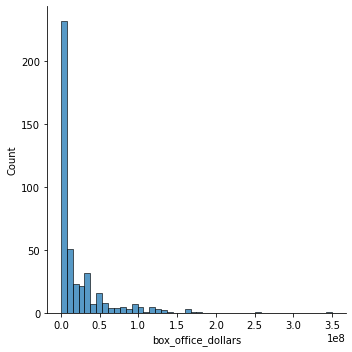

In [57]:
sns.displot(biopics['box_office_dollars'])

Hmmmm.  That doesn't look good (why?) . 

Let's see if we can make that look a bit more like a normal distribution.  Let's 
apply a log transform:

In [60]:
# take log to more like a normal distribution for future analysis

# statistical analysis results from this data become more valid . In other words, 
# the log transformation reduces or removes the skewness of our original data

biopics['log_box_office_dollars'] = np.log(biopics['box_office_dollars'])

In [61]:
biopics.head()

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress,box_office_dollars,log_box_office_dollars
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor,56700000.0,17.853285
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco,18300000.0,16.722412
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz,537000.0,13.193753
5,21,http://www.imdb.com/title/tt0478087/,US,2008,$81.2M,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess,81200000.0,18.212426
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,$1.13M,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan,1130000.0,13.937728


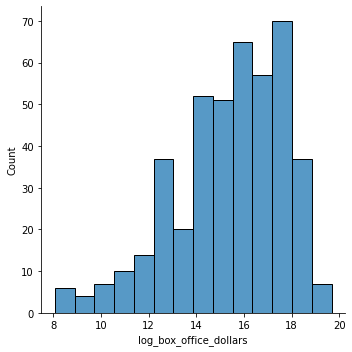

In [62]:
sns.displot(biopics['log_box_office_dollars'])

## Q8a: Use a boxplot to look at the relationship of log(box_office_dollars) and whether the subject of the biopic was a person of color or not

<AxesSubplot:xlabel='person_of_color', ylabel='log_box_office_dollars'>

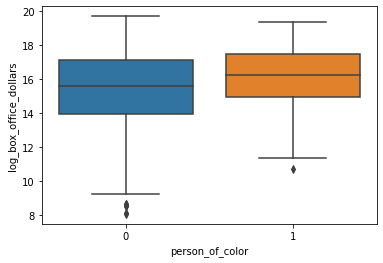

In [63]:
sns.boxplot(x="person_of_color",y="log_box_office_dollars",data=biopics)

## Q8b: Does it look like there's a difference between the two groups?

Yes, there is a minor distinction between the two groups. This is due to the fact that group 0 (blue), which represents the biopic that did not feature a person of color, has a lower mean than group 1 (orange), which features a person of color. And the group 0 (blue) interval, which indicates a biopic that did not feature a person of color, is wider than the group 1 (orange) interval, which represents a biography that did feature a person of color. And there are more outliers in group 0 (blue) than in group 1 (orange).

## Q9: Conduct an ANOVA to determine if there are statistically significant differences between the two groups.

In [64]:
res = smf.ols('log_box_office_dollars ~ person_of_color',biopics).fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     log_box_office_dollars   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     4.127
Date:                    Sat, 12 Feb 2022   Prob (F-statistic):             0.0428
Time:                            17:29:51   Log-Likelihood:                -984.42
No. Observations:                     437   AIC:                             1973.
Df Residuals:                         435   BIC:                             1981.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

Yes, at a 95% confidence level, there are statistically significant differences between the two groups. This is due to the F-p-value statistic's of 0.0428, which is less than 0.05. This means that the null hypothesis must be rejected, and we must infer that there are statistically significant differences between the two groups at the 95 percent confidence level.

## The t-test

To test of there's a statistically significant difference between two means, we
can use the independent sample t-test.  First, load up the right package:

In [65]:
from scipy.stats import ttest_ind

It's more readable if we split the data into two samples:

In [66]:
poc = biopics[biopics["person_of_color"] == 1]
not_poc = biopics[biopics["person_of_color"] == 0]

In [70]:
ttest_ind(poc["log_box_office_dollars"], not_poc["log_box_office_dollars"])
# get same p value

Ttest_indResult(statistic=2.0314176362558167, pvalue=0.042820052741479)

In [72]:
# ANOVA for 2 or more items which is more powerful, T-test only for 2 indep items
# ANOVA for variance, T-test for mean


## Q10: What does that mean?

This signifies that at the 95 percent confidence level, there are statistically significant differences in the means of "log of the box office by dollars" between the groups "the biopic was not a person of race" and "the biopic was a person of color." This is because the t-p-value test's is less than 0.05, implying that we must reject the null hypothesis and conclude that there are statistically significant differences in mean between two groups at the 95 percent confidence level.
The P-value is the result of any hypothesis test. The F-value is a step in finding the P-value of those tests that use the F distribution. The P-value for such a test is the probability, assuming the null hypothesis is true, that one might have got a value of F more extreme than the value you actually got.

The F-test can be used testing whether two samples from different normal distributions have the same variance. F is just the ratio of the sample variance estimates. The P-value is the probability, if the population variances are really the same, of getting an F in either tail more extreme than the F-value.

In ANOVA, F is the ratio of the error mean square to the model mean square. The P-value is the probability, if the means of the various populations are equal, of a value of F greater than what you observed.

P-value in Anova and p-value in t-test are almost the same. P-value in Anova is 0.0428 and p-value in t-test is 0.043.

## ANOVA
Ok, that's pretty straight-forward.  Let's look at a more complex problem:

In [73]:
biopics.subject_race.value_counts().sort_index()

African                        7
African American              31
Asian                          4
Asian American                 3
Caribbean                      1
Hispanic (Latin American)     10
Hispanic (Latina)              1
Hispanic (Latino)              4
Hispanic (White)               4
Indian                         1
Mediterranean                  1
Middle Eastern                 5
Middle Eastern (White)         8
Multi racial                  17
Native American                2
White                        218
Name: subject_race, dtype: int64

<AxesSubplot:xlabel='subject_race', ylabel='log_box_office_dollars'>

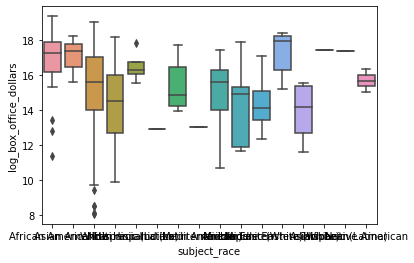

In [74]:
sns.boxplot(x="subject_race", y="log_box_office_dollars", data=biopics)

Without getting too worred about the fact that the axes are unreadable, it looks like
there are some differences between the different groups.  But are they real?

Let's start with an ANOVA:

In [75]:
box_office_dollars_lm = ols(
    'log_box_office_dollars ~ subject_race', data=biopics).fit()
# Type 2 ANOVA DataFrame: no interaction effect
table = sm.stats.anova_lm(box_office_dollars_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
subject_race,182.728250,15.0,2.566995,0.001263
Residual,1428.419809,301.0,NaN,NaN


In [77]:
res = smf.ols('log_box_office_dollars ~ subject_race', biopics).fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     log_box_office_dollars   R-squared:                       0.113
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     2.567
Date:                    Sat, 12 Feb 2022   Prob (F-statistic):            0.00126
Time:                            17:49:52   Log-Likelihood:                -688.41
No. Observations:                     317   AIC:                             1409.
Df Residuals:                         301   BIC:                             1469.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### Q11: Is there a statistically significant difference?

Yes, the means of "log of the box office by dollars" show a statistically significant difference. This is because the F Statistic's p-value is 0.001263, which is less than 0.05, implying that we must reject the null hypothesis and conclude that there is a statistically significant difference in the means of "log of the box office by dollars" among African Americans, Asians, and Middle Easterns (White) at the 95 percent confidence level.

Let's see what we get if we apply Tukey's HSD to the same model.

Let's apply Tukey's HSD using the same model and see what we get.

### Q12: Write code to use Tukey's HSD test on the subject_race variable and interpret the results.

In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [79]:
biopics.dtypes

title                      object
site                       object
country                    object
year_release                int64
box_office                 object
director                   object
number_of_subjects          int64
subject                    object
type_of_subject            object
race_known                 object
subject_race               object
person_of_color             int64
subject_sex                object
lead_actor_actress         object
box_office_dollars        float64
log_box_office_dollars    float64
dtype: object

In [80]:
biopics = biopics.dropna(subset=['subject_race'])

In [81]:
res3 = pairwise_tukeyhsd(biopics['log_box_office_dollars'], biopics['subject_race'])
res3.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
African,African American,1.9884,0.6818,-1.1618,5.1385,False
African,Asian,-1.0387,0.9,-5.757,3.6796,False
African,Asian American,2.1526,0.9,-3.0421,7.3472,False
African,Caribbean,2.517,0.9,-5.5306,10.5645,False
African,Hispanic (Latin American),0.4535,0.9,-3.2562,4.1632,False
African,Hispanic (Latina),2.4782,0.9,-5.5694,10.5257,False
African,Hispanic (Latino),1.5807,0.9,-3.1376,6.299,False
African,Hispanic (White),-0.4918,0.9,-5.2101,4.2265,False
African,Indian,-2.0048,0.9,-10.0524,6.0427,False
African,Mediterranean,-1.896,0.9,-9.9435,6.1516,False


The Tukey's honestly significant difference test (Tukey's HSD) is used to determine the significance of differences between sample means. Tukey's HSD examines all pairwise differences while reducing the chance of making one or more Type I errors.

There is a statistically significant difference in the means of "log of the box office by dollars" between the "African American" group and the "Multi racial" group, as well as a statistically significant difference between the "African American" group and the "White" group. This is because the p-value of Tukey HSD for the first one is 0.0064 and for the second one is 0.0073, both of which are less than 0.05.

These results indicate that we must reject the null hypothesis using the Tukey HSD test, and that there is a statistically significant difference in the means of "log of the box office by dollars" between "African American" and "Multi racial" groups, as well as a statistically significant difference between "African American" and "White" groups.

   
We can also get the conclusion by "rejection" == True, means can reject H0, so there is difference between these 2 groups.

# <font color="green">END OF NOTEBOOK</font>
## Remember to submit HTML and IPYNB files via Canvas.